# Step 2: Preparing data for training

Objectives

- 3.1. Importing daily scores from news folder
- 3.2. Importing daily stock data from stock folder
- 3.3. Merge both the imported data with date
- 3.4. Saving the merged data
- 3.5. Check data by plotting the graph


In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt

### 3.1. Importing daily scores from news folder


In [2]:
with open('wiprodaily_scores.json', 'r') as file:
    sentimentScores = json.load(file)
#endwith

dfSentiment = pd.DataFrame(list(sentimentScores.items()), columns=['jsonDate', 'sentiment'])
dfSentiment['date'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')

dfSentiment['date'] = dfSentiment['date'].dt.strftime('%Y-%m-%d')
dfSentiment['jsonDate'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')
dfSentiment['jsonDate'] = dfSentiment['jsonDate'].dt.strftime('%Y-%m-%d')


dfSentiment.head()

,jsonDate,sentiment,date
0,2011-07-20,"[0.0884043350815773, 0.1496923714876175, 0.258...",2011-07-20
1,2011-07-21,"[0.2098713368177414, 0.167141854763031, 0.2136...",2011-07-21
2,2011-07-22,"[0.14792072772979736, 0.13467203080654144, 0.1...",2011-07-22
3,2011-07-23,"[0.24480246007442474, 0.21120786666870117, 0.2...",2011-07-23
4,2011-07-27,"[0.04280705004930496, 0.06868153810501099, 0.2...",2011-07-27


### 3.2. Importing daily stock data from stock folder

- Data used will be of Habib Bank Limited (HBL)
- This bank is considered to be the top performing and one of the most profitable bank in the country [[Source: AsiaMoney](https://www.asiamoney.com/article/2bp0xnj0tjyfvvwhd8oow/awards/best-bank-awards/pakistans-best-domestic-bank-2023-hbl)]
- This bank has branches outside Pakistan as well


In [3]:
#csvFilePath = 'M:\miniproject\wiproBANK_2013-01-01_to_2024_01-01.csv'
dfCsv = pd.read_csv("inputdatafiles/wipro_2013-01-01_to_2024_01-01.csv")
dfCsv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,148.518784,149.625031,146.681290,148.837540,135.073914,2123743
1,2013-01-02,149.362534,149.718781,146.887543,147.656281,134.001877,2283188
2,2013-01-03,148.312531,149.625031,147.693787,149.175034,135.380203,4646500
3,2013-01-04,149.587540,151.837540,149.118790,151.368790,137.371063,4531406
4,2013-01-07,151.406281,153.187531,151.143784,151.856293,137.813477,3332353


### 3.3. Merge both the imported data with date


In [4]:
# Convert 'Date' column in dfCsv to datetime
dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%Y-%m-%d')

# Convert 'date' column in dfSentiment to datetime
dfSentiment['date'] = pd.to_datetime(dfSentiment['date'], format='%Y-%m-%d')

# Merge dfCsv and dfSentiment on 'date'
dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')

# Replace non-list values in 'sentiment' with [0, 0, 0, 0, 0]
dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: x if isinstance(x, list) else [0, 0, 0, 0, 0])

# Split 'sentiment' list into separate columns
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])

# Concatenate dfMerged and dfSentimentColumns
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)

# Drop unnecessary columns
dfMerged = dfMerged.drop(columns=['date', 'sentiment', 'jsonDate'])

dfMerged.to_csv('wipro_merged.csv', index=False)
# Display the first 10 rows of dfMerged
dfMerged.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,feature1,feature2,feature3,feature4,feature5
0,2013-01-01,148.518784,149.625031,146.681290,148.837540,135.073914,2123743,0.0,0.0,0.0,0.0,0.0
1,2013-01-02,149.362534,149.718781,146.887543,147.656281,134.001877,2283188,0.0,0.0,0.0,0.0,0.0
2,2013-01-03,148.312531,149.625031,147.693787,149.175034,135.380203,4646500,0.0,0.0,0.0,0.0,0.0
3,2013-01-04,149.587540,151.837540,149.118790,151.368790,137.371063,4531406,0.0,0.0,0.0,0.0,0.0
4,2013-01-07,151.406281,153.187531,151.143784,151.856293,137.813477,3332353,0.0,0.0,0.0,0.0,0.0
5,2013-01-08,151.087540,151.781281,148.350037,149.306290,135.499298,2919271,0.0,0.0,0.0,0.0,0.0
6,2013-01-09,149.343781,150.337540,147.581284,148.893784,135.124954,3836260,0.0,0.0,0.0,0.0,0.0
7,2013-01-10,149.550034,152.175034,147.562531,148.350037,134.631454,4953124,0.0,0.0,0.0,0.0,0.0
8,2013-01-11,152.250031,158.550034,151.706284,157.481293,142.918335,12020132,0.0,0.0,0.0,0.0,0.0
9,2013-01-14,158.643784,159.337540,156.506287,157.181290,142.646057,4215892,0.0,0.0,0.0,0.0,0.0


### 3.4. Saving the merged data

- Saving the file in CSV format ((wipro_merged.csv))


In [7]:
outputCsvPath = 'wipro_merged.csv'
dfMerged.to_csv(outputCsvPath, index=False)

### 3.5. Check data by plotting the graph


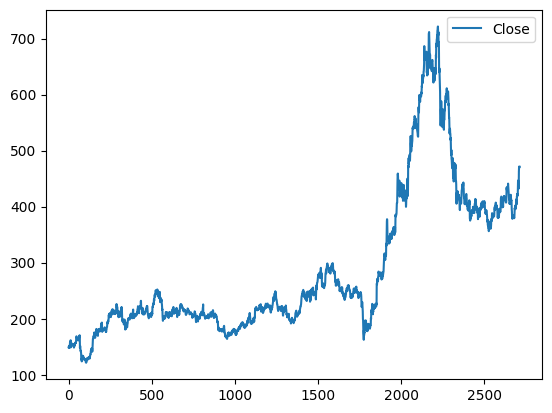

In [6]:
dfMerged[['Close']].plot()
plt.show()